In [75]:
from dotenv import load_dotenv
load_dotenv()

True

In [76]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="deepseek-r1-distill-llama-70b")

In [77]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [78]:
url= "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [79]:
from langchain_community.document_loaders import WebBaseLoader
web_loader=WebBaseLoader(url)
data=web_loader.load()

data

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [80]:
urls=[
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]
docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [81]:
docs_list=[item for sublist in docs for item in sublist]
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [82]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100,chunk_overlap=25)

doc_splits=text_splitter.split_documents(docs_list)

doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [83]:
from langchain_community.vectorstores import Chroma

vectorstore=Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chrome",
    embedding=embeddings
)

retriever=vectorstore.as_retriever()

In [84]:
retriever.invoke("what is agent and prompt?")

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'language': 'en', 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term mem

In [85]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool=create_retriever_tool(
    retriever,
    "retriever_blog_post",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    )

In [86]:
tools=[retriever_tool]

In [87]:
from langgraph.prebuilt import ToolNode

In [88]:
retriever_node=ToolNode(tools)

In [89]:
from typing import Annotated,Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import HumanMessage

In [90]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [91]:
def LLM_Decision_Maker(state:AgentState):
    print("----CALL LLM_DECISION_MAKE----")

    messages=state["messages"]
    print("messages", messages)

    if len(messages) > 1:
        last_message=messages[-1]
        question=messages.content

        prompt=PromptTemplate(
              template="""You are a helpful assistant whatever question has been asked to find out that in the given question and answer.
                        Here is the question:{question}
                        """,
                        input_variables=["question"]
        )
        chain=prompt|llm
        response=chain.invoke({"question":question})
        print("Tool not identified")
    else:
        llm_with_tool=llm.bind_tools(tools)
        response=llm_with_tool.invoke(messages)
    
    print("LLM_Decision_Maker response:", response)
    return {"messages":[response]}

In [92]:

from langchain_core.pydantic_v1 import BaseModel, Field


class grade(BaseModel):
    binary_score:str=Field(description="Relvance score 'yes' or 'no'")

In [93]:
from typing import Literal
#we use it for type of hinting

In [94]:
def grade_documents(state:AgentState):
    print("----CALLING GRADE FOR CHECKING RELEVANCY----")

    llm_with_structure_output=llm.with_structured_output(grade)

    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    
    chain=prompt|llm_with_structure_output

    message=state['messages']
    
    last_message = message[-1]
    
    question = message[0].content
    
    docs = last_message.content
    print("question",question,"context",docs)

    result=chain.invoke({"question":question,"context":docs})

    score=result.binary_score

    if score=="yes":
        print("----DECISION: DOCS ARE RELEVANT----")
        return "generator"
    else:
        print("----DECISION: DOCS ARE NOT RELEVANT----")
        return "rewriter"


In [95]:
from langchain import hub
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [96]:
def generate(state:AgentState):
    print("----RAG OUTPUT GENERATE----")

    message=state["messages"]
    question=message[0].content
    
    last_message = message[-1]
    docs = last_message.content

    prompt=hub.pull("rlm/rag-prompt")
    
    rag_chain=prompt | llm

    print("context", docs, "question", question)
    
    response=rag_chain.invoke({"context": docs, "question": question})
    
    print(f"this is my response:{response}")
    
    return {"messages": [response]}


In [97]:
def rewrite(state:AgentState):
    print("----TRANSFORM/rewrite QUERY----")
    message=state["messages"]
    
    question=message[0].content
    
    input= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]

    response=llm.invoke(input)

    print("rewrite node response: ", response)
    
    return {"messages": [response]}

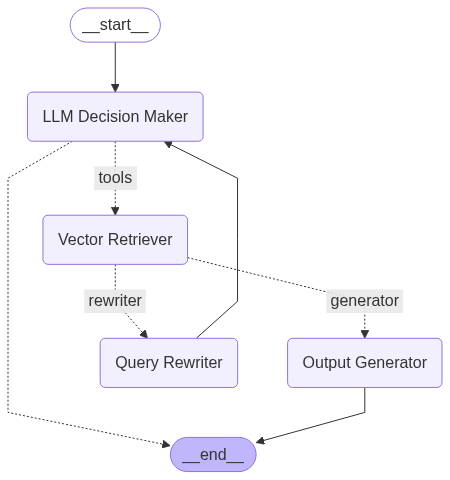

In [98]:

from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import tools_condition

workflow=StateGraph(AgentState)
workflow.add_node("LLM Decision Maker",LLM_Decision_Maker)
workflow.add_node("Vector Retriever",retriever_node)
workflow.add_node("Output Generator",generate)
workflow.add_node("Query Rewriter",rewrite)


workflow.add_edge(START,"LLM Decision Maker")

workflow.add_conditional_edges("LLM Decision Maker",
                               tools_condition,
                               {"tools":"Vector Retriever",
                                END:END
                                })

workflow.add_conditional_edges("Vector Retriever",
                               grade_documents,
                               {"generator":"Output Generator",
                                "rewriter":"Query Rewriter"
                                })

workflow.add_edge("Output Generator",END)
workflow.add_edge("Query Rewriter","LLM Decision Maker")


app=workflow.compile()
app

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
app.invoke({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]})

----CALL LLM_DECISION_MAKE----
messages [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='2653aec2-880b-4339-bfdf-b3ae71461537')]
LLM_Decision_Maker response: content='' additional_kwargs={'tool_calls': [{'id': '720971qvp', 'function': {'arguments': '{"query":"LLM-powered autonomous agents planning reflection prompt engineering LangChain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 391, 'prompt_tokens': 242, 'total_tokens': 633, 'completion_time': 1.8204471629999999, 'prompt_time': 0.015805015, 'queue_time': 0.063799885, 'total_time': 1.836252178}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--06ce6da5-bdc2-42f7-b6ad-53c83d2a72ea-0' tool_calls=[{'name': 'retri

{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='2653aec2-880b-4339-bfdf-b3ae71461537'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '720971qvp', 'function': {'arguments': '{"query":"LLM-powered autonomous agents planning reflection prompt engineering LangChain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 391, 'prompt_tokens': 242, 'total_tokens': 633, 'completion_time': 1.8204471629999999, 'prompt_time': 0.015805015, 'queue_time': 0.063799885, 'total_time': 1.836252178}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--06ce6da5-bdc2-42f7-b6ad-53c83d2a72ea-0', tool_calls=[{'name': 'retriever_blog_post', 'args': {'query': 'LLM-

In [102]:
app.invoke({"messages":["what is a capital of india?"]})

----CALL LLM_DECISION_MAKE----
messages [HumanMessage(content='what is a capital of india?', additional_kwargs={}, response_metadata={}, id='07b28a06-fc3d-42bd-81d7-1b4063c03b30')]
LLM_Decision_Maker response: content='The capital of India is **New Delhi**.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 224, 'total_tokens': 313, 'completion_time': 0.48450817, 'prompt_time': 0.013770007, 'queue_time': 0.054021812, 'total_time': 0.498278177}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None} id='run--12c6965e-6025-4974-888d-d84a5de55310-0' usage_metadata={'input_tokens': 224, 'output_tokens': 89, 'total_tokens': 313}


{'messages': [HumanMessage(content='what is a capital of india?', additional_kwargs={}, response_metadata={}, id='07b28a06-fc3d-42bd-81d7-1b4063c03b30'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 224, 'total_tokens': 313, 'completion_time': 0.48450817, 'prompt_time': 0.013770007, 'queue_time': 0.054021812, 'total_time': 0.498278177}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--12c6965e-6025-4974-888d-d84a5de55310-0', usage_metadata={'input_tokens': 224, 'output_tokens': 89, 'total_tokens': 313})]}